#1.&nbsp;Business Understanding


Pulau Madura adalah salah satu destinasi wisata dengan potensi besar di Indonesia, menawarkan perpaduan unik antara keindahan alam, kekayaan budaya, dan sejarah yang menarik. Meskipun memiliki daya tarik yang signifikan, visibilitas destinasi wisata di Madura masih dapat ditingkatkan untuk menarik lebih banyak wisatawan. Dengan semakin beragamnya preferensi wisatawan, pengembangan sistem yang dapat memberikan rekomendasi destinasi wisata yang relevan dan sesuai dengan minat serta preferensi pengguna menjadi krusial.



Proyek ini bertujuan untuk mengembangkan sistem rekomendasi destinasi wisata di Pulau Madura yang memanfaatkan data destinasi wisata yang komprehensif. Sistem rekomendasi ini dirancang untuk membantu wisatawan dalam memilih tempat wisata berdasarkan informasi detail seperti nama wisata, asal kota, alamat lengkap, jam buka, jam tutup, deskripsi wisata, kategori wisata, jumlah pengunjung, harga tiket, fasilitas, rating, serta koordinat geografis (latitude dan longitude). Dengan sistem rekomendasi yang cerdas ini, wisatawan tidak hanya mendapatkan informasi yang sesuai dengan preferensi pribadi mereka, tetapi juga dapat mengoptimalkan pengalaman berwisata mereka di Madura dengan memilih tempat yang menawarkan nilai terbaik sesuai dengan harapan.

**Solusi yang Ditawarkan:**


Sistem rekomendasi yang dikembangkan dalam proyek ini menggunakan pendekatan machine learning dengan data destinasi wisata Madura untuk memberikan rekomendasi yang lebih terarah dan relevan bagi wisatawan. Sistem ini akan mempertimbangkan berbagai faktor, seperti rating tempat wisata, ketersediaan fasilitas, jumlah pengunjung, harga tiket, dan lokasi geografis. Model rekomendasi dibangun menggunakan TensorFlow dan Keras dengan arsitektur Multilayer Perceptron (MLP). Data akan melalui pra-pemrosesan seperti penggunaan TF-IDF untuk fitur teks (kota), normalisasi untuk fitur numerik (rating, fasilitas, jumlah pengunjung, harga tiket), serta Label Encoder untuk kategori wisata. Pendekatan ini bertujuan untuk memberikan rekomendasi yang lebih personal dan meningkatkan visibilitas destinasi wisata di Madura.

#2.&nbsp;Data Understanding

##Dataset

Sumber data yang digunakan berasal dari dataset destinasi wisata yang dapat diakses melalui tautan berikut:
https://docs.google.com/spreadsheets/d/1FYtbusduf4XeDl9eFYmtwFVKesOkmmqD/edit?usp=sharing&ouid=109668250720515860025&rtpof=true&sd=true

Dataset ini berisi data destinasi wisata di Madura dengan jumlah 103 baris.

Berikut ini adalah dataset destinasi wisata di Madura:
1. Nama: Nama destinasi wisata
2. Asal Kota: Kota tempat destinasi berada
3. Alamat Lengkap: Lokasi destinasi secara detail
4. Jam Buka: Jam buka operasional destinasi
5. Jam Tutup: Jam tutup operasional destinasi
6. Deskripsi Wisata: Deskripsi singkat tentang destinasi
7. Kategori Wisata: Kategori jenis wisata
8. Sering Dikunjungi (Keramaian): Jumlah pengunjung wisata, bisa jadi indikator popularitas
9. Harga Tiket: Harga tiket masuk destinasi
10. Fasilitas: Fasilitas yang tersedia di lokasi
11. Rating: Nilai rating destinasi (skala 1-5)
12. Latitude: Koordinat geografis destinasi yang menunjukkan posisi utara atau selatan dari garis khatulistiwa (lintang)
13. Longitude: Koordinat geografis destinasi yang menunjukkan posisi timur atau barat dari garis meridian utama (bujur)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('Set1')
sns.set()
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics.pairwise import cosine_similarity

## Load Dataset

Uploud file .xlsx disini

In [2]:
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name="DATASET")

Saving Dataset Wisata Madura (indo).xlsx to Dataset Wisata Madura (indo).xlsx


##Eksplorasi Data

In [3]:
df.head()

,Nama Wisata,Asal Kota,Alamat Lengkap,Jam Buka,Jam Tutup,Deskripsi Wisata,Kategori Wisata,Sering Dikunjungi (Keramaian),Harga Tiket,Fasilitas,Rating,Latitude,Longitude,url_image
0,Agro Edu Wisata Kebun Bang Jani,Bangkalan,"Kamp. Du'ur, Desa, Granggurar, Langkap, Kec. B...",08:00:00,11:00:00,Agro Edu Wisata Kebun Bang Jani di Bangkalan m...,Kebun,2342.0,0,"Musollah, Parkir, Toilet",4.5,-7.056253,112.777121,https://firebasestorage.googleapis.com/v0/b/ne...
1,Pantai Rindu,Bangkalan,"Sukolilo Bar., Kabupaten Bangkalan, Jawa Timur",-,-,Pantai Rindu di Bangkalan menyuguhkan pesona a...,Pantai,400.0,0,"Musollah, Parkir, Toilet",3.7,-7.159381,112.776644,https://firebasestorage.googleapis.com/v0/b/ne...
2,Wisata Alam Kesek,Bangkalan,"Kesek, Kec. Labang, Kabupaten Bangkalan, Jawa ...",09:00:00,22:00:00,Wisata Alam Kesek adalah kawasan wisata alam y...,Cafe,5673.0,15000,"Musollah, Parkir, Toilet, Kuliner",4.2,-7.160329,112.772191,https://firebasestorage.googleapis.com/v0/b/ne...
3,Pandela (Pantai Desa Lajing),Bangkalan,"Pocogan, Lajing, Kec. Arosbaya, Kabupaten Bang...",00:00:00,23:59:00,"Pantai Desa Lajing, yang lebih dikenal dengan ...",Pantai,8673.0,0,"Toilet, Warung",3.8,-6.972755,112.794237,https://firebasestorage.googleapis.com/v0/b/ne...
4,Makam Agung Arosbaya,Bangkalan,"Area Sawah/Kebun, Makam Agung, Kec. Arosbaya, ...",00:00:00,23:59:00,Makam Agung Arosbaya di Bangkalan adalah tempa...,Religi,73159.0,0,-,4.6,-6.955721,112.847746,https://firebasestorage.googleapis.com/v0/b/ne...


In [4]:
df.shape

(103, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Nama Wisata                    103 non-null    object 
 1   Asal Kota                      103 non-null    object 
 2   Alamat Lengkap                 103 non-null    object 
 3   Jam Buka                       103 non-null    object 
 4   Jam Tutup                      103 non-null    object 
 5   Deskripsi Wisata               103 non-null    object 
 6   Kategori Wisata                103 non-null    object 
 7   Sering Dikunjungi (Keramaian)  103 non-null    float64
 8   Harga Tiket                    103 non-null    int64  
 9   Fasilitas                      103 non-null    object 
 10  Rating                         103 non-null    float64
 11  Latitude                       103 non-null    float64
 12  Longitude                      103 non-null    flo

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(df.describe())

       Sering Dikunjungi (Keramaian)  Harga Tiket  Rating  Latitude  Longitude
count                         103.00       103.00  103.00    103.00     103.00
mean                       192612.33      7427.18    4.37     -7.05     113.64
std                       1242504.63     29682.83    0.36      0.11       2.48
min                            80.00         0.00    2.30     -7.31     112.71
25%                          1394.50         0.00    4.20     -7.16     113.08
50%                          5836.00      2000.00    4.40     -7.03     113.44
75%                         16462.00     10000.00    4.60     -6.97     113.83
max                      11620000.00    300000.00    5.00     -6.87     138.16


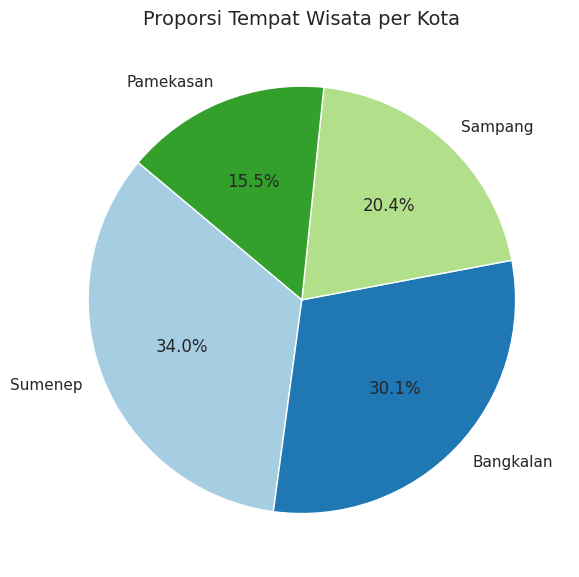

In [7]:
# Hitung jumlah tempat wisata per kota
number_of_city = df['Asal Kota'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
colors = plt.cm.Paired.colors  # Skema warna bawaan
number_of_city.plot(
    kind='pie',
    autopct='%1.1f%%',       # Tampilkan persentase
    startangle=140,          # Rotasi awal
    colors=colors,
    shadow=False             # Tambahkan bayangan
)

plt.title("Proporsi Tempat Wisata per Kota", fontsize=14)
plt.ylabel("")  # Hilangkan label sumbu Y
plt.tight_layout()
plt.show()

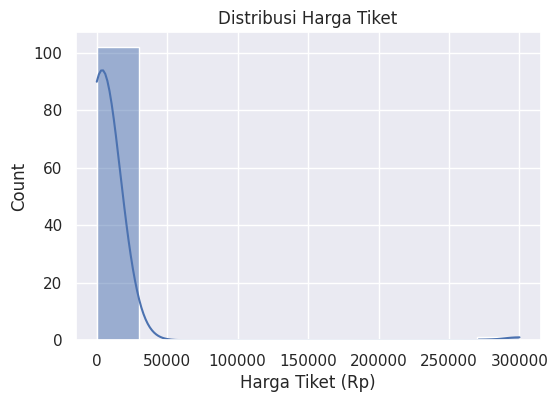

In [8]:
# Distribusi Harga Tiket
plt.figure(figsize=(6, 4))
sns.histplot(df['Harga Tiket'], bins=10, kde=True)
plt.title("Distribusi Harga Tiket")
plt.xlabel("Harga Tiket (Rp)")
plt.show()

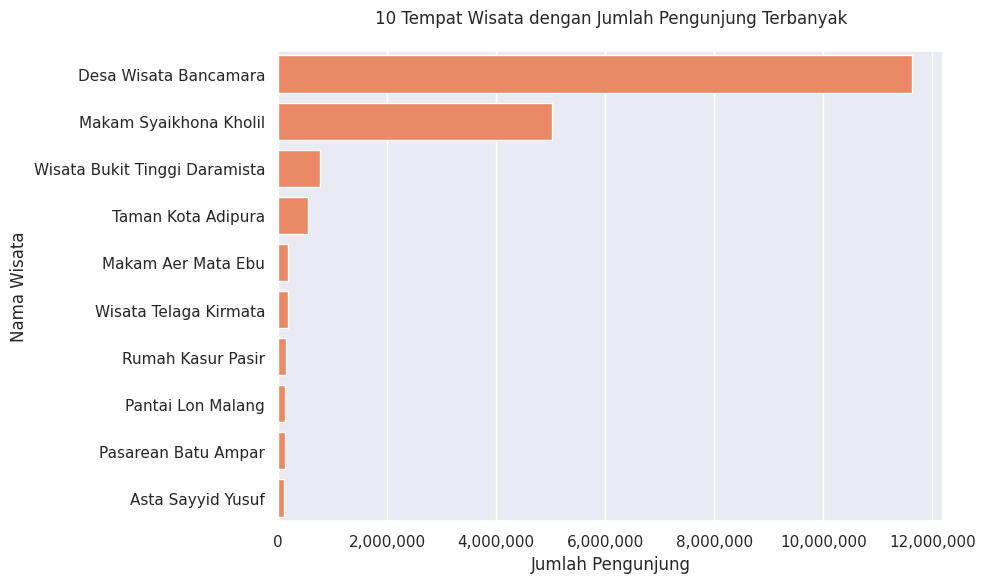

In [9]:
from matplotlib import ticker

# Pilih 10 tempat wisata dengan jumlah pengunjung terbanyak
top_10 = df.nlargest(10, 'Sering Dikunjungi (Keramaian)')

plt.figure(figsize=(10, 6))
# Gunakan 'nama' sebagai nama kolom untuk sumbu y
sns.barplot(x='Sering Dikunjungi (Keramaian)', y='Nama Wisata', data=top_10, color='coral')

plt.title('10 Tempat Wisata dengan Jumlah Pengunjung Terbanyak', pad=20)
plt.xlabel('Jumlah Pengunjung')
plt.ylabel('Nama Wisata')

# Matikan notasi ilmiah di sumbu x
plt.gca().get_xaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

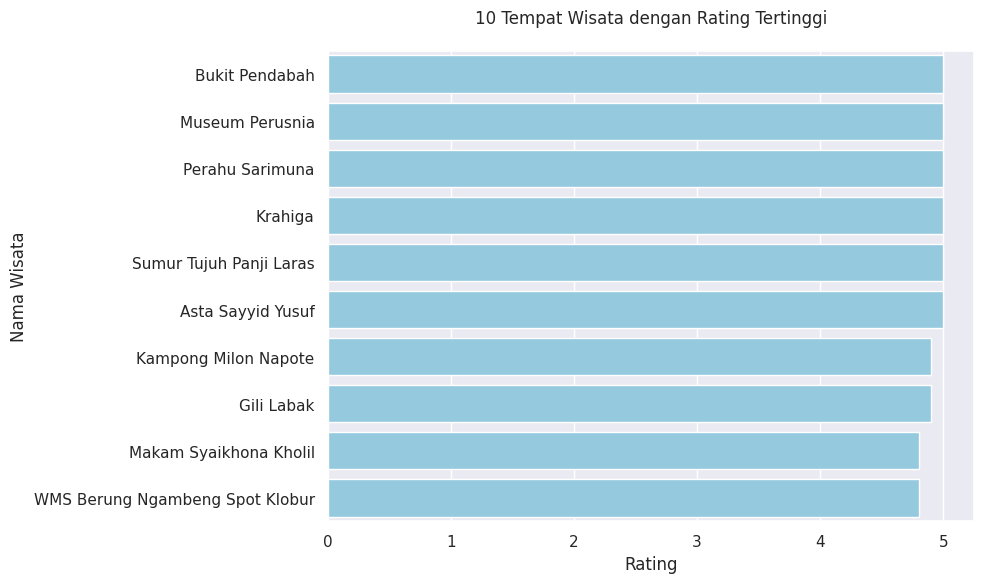

In [10]:
# Pilih 10 tempat wisata dengan rating tertinggi
top_10 = df.nlargest(10, 'Rating')

plt.figure(figsize=(10, 6))
# Gunakan 'nama' sebagai nama kolom untuk sumbu y
sns.barplot(x='Rating', y='Nama Wisata', data=top_10, color='skyblue')

plt.title('10 Tempat Wisata dengan Rating Tertinggi', pad=20)
plt.xlabel('Rating')
plt.ylabel('Nama Wisata')

# Matikan notasi ilmiah di sumbu x
plt.gca().get_xaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

#3.&nbsp;Data Preparation

## Data Cleaning




In [11]:
df.isna().sum()

,0
Nama Wisata,0
Asal Kota,0
Alamat Lengkap,0
Jam Buka,0
Jam Tutup,0
Deskripsi Wisata,0
Kategori Wisata,0
Sering Dikunjungi (Keramaian),0
Harga Tiket,0
Fasilitas,0


In [12]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
# 1. Menyederhanakan nama kolom agar konsisten.
df.rename(columns={
    "Nama Wisata": "name",
    "Asal Kota": "city",
    "Alamat Lengkap": "location",
    "Jam Buka": "openingHours",
    "Jam Tutup": "closingHours",
    "Deskripsi Wisata": "description",
    "Kategori Wisata": "category",
    "Sering Dikunjungi (Keramaian)": "visitor",
    "Harga Tiket": "price",
    "Fasilitas": "facilities",
    "Rating": "rating",
    "Latitude": "lat",
    "Longitude": "lon"
}, inplace=True)

In [14]:
# Konversi tipe data
# Mengubah tipe data float64 pada kolom 'jumlah_pengunjung' menjadi int64
df['visitor'] = df['visitor'].astype('int64')


In [15]:
# Gabungkan menjadi satu kolom koordinat (dalam bentuk tuple)
df['coordinat'] = list(zip(df['lat'], df['lon']))
df['coordinat'] = df.apply(lambda row: f"lat: {row['lat']:.5f}, long: {row['lon']:.5f}", axis=1)
df

,name,city,location,openingHours,closingHours,description,category,visitor,price,facilities,rating,lat,lon,url_image,coordinat
0,Agro Edu Wisata Kebun Bang Jani,Bangkalan,"Kamp. Du'ur, Desa, Granggurar, Langkap, Kec. B...",08:00:00,11:00:00,Agro Edu Wisata Kebun Bang Jani di Bangkalan m...,Kebun,2342,0,"Musollah, Parkir, Toilet",4.50,-7.06,112.78,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.05625, long: 112.77712"
1,Pantai Rindu,Bangkalan,"Sukolilo Bar., Kabupaten Bangkalan, Jawa Timur",-,-,Pantai Rindu di Bangkalan menyuguhkan pesona a...,Pantai,400,0,"Musollah, Parkir, Toilet",3.70,-7.16,112.78,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.15938, long: 112.77664"
2,Wisata Alam Kesek,Bangkalan,"Kesek, Kec. Labang, Kabupaten Bangkalan, Jawa ...",09:00:00,22:00:00,Wisata Alam Kesek adalah kawasan wisata alam y...,Cafe,5673,15000,"Musollah, Parkir, Toilet, Kuliner",4.20,-7.16,112.77,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.16033, long: 112.77219"
3,Pandela (Pantai Desa Lajing),Bangkalan,"Pocogan, Lajing, Kec. Arosbaya, Kabupaten Bang...",00:00:00,23:59:00,"Pantai Desa Lajing, yang lebih dikenal dengan ...",Pantai,8673,0,"Toilet, Warung",3.80,-6.97,112.79,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -6.97275, long: 112.79424"
4,Makam Agung Arosbaya,Bangkalan,"Area Sawah/Kebun, Makam Agung, Kec. Arosbaya, ...",00:00:00,23:59:00,Makam Agung Arosbaya di Bangkalan adalah tempa...,Religi,73159,0,-,4.60,-6.96,112.85,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -6.95572, long: 112.84775"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Pantai Keris,Sumenep,"XX35+QQ2, Gersik Putih, Gapura, Sumenep Regenc...",00:00:00,23:59:00,wisata pantai dengan keunikan karena diapit ol...,Alam,2571,0,-,4.70,-7.05,113.96,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.04562, long: 113.95939"
99,Desa Wisata Bancamara,Sumenep,"Bancamara, Dungkek, Sumenep Regency, East Java",00:00:00,23:59:00,desa wisata bancamara dengan wisata pendukung ...,Budaya,11620000,5000,"warung, parkir, toilet",4.80,-6.99,114.17,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -6.99352, long: 114.17357"
100,Pantai Sembilan Gili Genting,Sumenep,"Jalan Raya Bringsang, Bringsang, Giligenteng, ...",00:00:00,23:59:00,wisata pantai di gili genting,Alam,5223,0,"parkir, toilet, musollah, kuliner",4.50,-7.18,113.92,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.17517, long: 113.92182"
101,Pantai E Kaoghi,Sumenep,"Nonggunong, Tanjung, Saronggi, Sumenep Regency...",07:00:00,21:00:00,"pantai di desa tanjung, saronggi dengan pasir ...",Alam,44688,10000,"Parkir, Warung, Toilet",4.20,-7.10,113.89,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.10493, long: 113.88753"


##Transformasi Data

In [16]:
# Encode kota (target)
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])

In [17]:
print("📌 Mapping Label:")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

📌 Mapping Label:
Bangkalan: 0
Pamekasan: 1
Sampang: 2
Sumenep: 3


In [18]:
# Encode kota (target)
label_encoder_kategori = LabelEncoder()
df['city_encoded'] = label_encoder_kategori.fit_transform(df['city'])

In [19]:
df['category'] = label_encoder_kategori.fit_transform(df['category'])

In [20]:
print("📌 Mapping Label:")
for label, code in zip(label_encoder_kategori.classes_, label_encoder_kategori.transform(label_encoder_kategori.classes_)):
    print(f"{label}: {code}")

📌 Mapping Label:
Alam: 0
Budaya: 1
Cafe: 2
Edukasi: 3
Kebun: 4
Pantai: 5
Religi: 6
Taman: 7
Wahana Air: 8


In [21]:
# Mengubah "-" menjadi string kosong pada kolom 'fasilitas'
df['facilities'] = df['facilities'].replace(["-"], "Tidak ada")

# Menghitung jumlah fasilitas setelah pemrosesan
# Jika nilai di kolom adalah "0", tetap jadikan 0 (sehingga nantinya 0.0 sebagai float)
df['facilities'] = df['facilities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) and x != "0" else 0)

df.head()

,name,city,location,openingHours,closingHours,description,category,visitor,price,facilities,rating,lat,lon,url_image,coordinat,city_encoded
0,Agro Edu Wisata Kebun Bang Jani,Bangkalan,"Kamp. Du'ur, Desa, Granggurar, Langkap, Kec. B...",08:00:00,11:00:00,Agro Edu Wisata Kebun Bang Jani di Bangkalan m...,4,2342,0,3,4.50,-7.06,112.78,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.05625, long: 112.77712",0
1,Pantai Rindu,Bangkalan,"Sukolilo Bar., Kabupaten Bangkalan, Jawa Timur",-,-,Pantai Rindu di Bangkalan menyuguhkan pesona a...,5,400,0,3,3.70,-7.16,112.78,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.15938, long: 112.77664",0
2,Wisata Alam Kesek,Bangkalan,"Kesek, Kec. Labang, Kabupaten Bangkalan, Jawa ...",09:00:00,22:00:00,Wisata Alam Kesek adalah kawasan wisata alam y...,2,5673,15000,4,4.20,-7.16,112.77,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.16033, long: 112.77219",0
3,Pandela (Pantai Desa Lajing),Bangkalan,"Pocogan, Lajing, Kec. Arosbaya, Kabupaten Bang...",00:00:00,23:59:00,"Pantai Desa Lajing, yang lebih dikenal dengan ...",5,8673,0,2,3.80,-6.97,112.79,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -6.97275, long: 112.79424",0
4,Makam Agung Arosbaya,Bangkalan,"Area Sawah/Kebun, Makam Agung, Kec. Arosbaya, ...",00:00:00,23:59:00,Makam Agung Arosbaya di Bangkalan adalah tempa...,6,73159,0,1,4.60,-6.96,112.85,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -6.95572, long: 112.84775",0


##TF-IDF Vectorizer

In [22]:
# TF-IDF pada kategori
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
X_city = tfidf.fit_transform(df['city']).toarray()

In [23]:
df.head()

,name,city,location,openingHours,closingHours,description,category,visitor,price,facilities,rating,lat,lon,url_image,coordinat,city_encoded
0,Agro Edu Wisata Kebun Bang Jani,Bangkalan,"Kamp. Du'ur, Desa, Granggurar, Langkap, Kec. B...",08:00:00,11:00:00,Agro Edu Wisata Kebun Bang Jani di Bangkalan m...,4,2342,0,3,4.50,-7.06,112.78,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.05625, long: 112.77712",0
1,Pantai Rindu,Bangkalan,"Sukolilo Bar., Kabupaten Bangkalan, Jawa Timur",-,-,Pantai Rindu di Bangkalan menyuguhkan pesona a...,5,400,0,3,3.70,-7.16,112.78,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.15938, long: 112.77664",0
2,Wisata Alam Kesek,Bangkalan,"Kesek, Kec. Labang, Kabupaten Bangkalan, Jawa ...",09:00:00,22:00:00,Wisata Alam Kesek adalah kawasan wisata alam y...,2,5673,15000,4,4.20,-7.16,112.77,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -7.16033, long: 112.77219",0
3,Pandela (Pantai Desa Lajing),Bangkalan,"Pocogan, Lajing, Kec. Arosbaya, Kabupaten Bang...",00:00:00,23:59:00,"Pantai Desa Lajing, yang lebih dikenal dengan ...",5,8673,0,2,3.80,-6.97,112.79,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -6.97275, long: 112.79424",0
4,Makam Agung Arosbaya,Bangkalan,"Area Sawah/Kebun, Makam Agung, Kec. Arosbaya, ...",00:00:00,23:59:00,Makam Agung Arosbaya di Bangkalan adalah tempa...,6,73159,0,1,4.60,-6.96,112.85,https://firebasestorage.googleapis.com/v0/b/ne...,"lat: -6.95572, long: 112.84775",0


##Normalisasi Data

In [24]:
# Gabungkan fitur
scaler = MinMaxScaler()
X_rating = scaler.fit_transform(df[['rating']])
X_facilities = scaler.fit_transform(df[['facilities']])
X_visitor = scaler.fit_transform(df[['visitor']])
X_price = scaler.fit_transform(df[['price']])

# 4.&nbsp;Modelling

##Model Multilayer Perceptron (MLP) atau fully connected neural network.

Splitting Data

In [25]:
X = np.hstack([X_city, X_rating, X_facilities, X_visitor, X_price])
y = df['city_encoded']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Arsitektur Model

Model dibangun menggunakan TensorFlow dan Keras

- Aktivasi: ReLU (hidden layer), Softmax (output layer)
- Loss Function: Sparse Categorical Crossentropy
- Optimizer: Adam
- Evaluasi: akurasi
- Epoch: 30
- Batch size: 32
- Training Model: Model dilatih dengan data X_train dan y_train yang merupakan hasil dari penggabungan TF-IDF, rating, dan fasilitas.

In [26]:
# Di sini akan membangun arsitektur model (tuning dilakukan di sini)
model = tf.keras.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Ubah sesuai input feature shape
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.2581 - loss: 1.3875 - val_accuracy: 0.6667 - val_loss: 1.3186
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7077 - loss: 1.3078 - val_accuracy: 0.8889 - val_loss: 1.2274
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6335 - loss: 1.2415 - val_accuracy: 1.0000 - val_loss: 1.1334
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8123 - loss: 1.1688 - val_accuracy: 1.0000 - val_loss: 1.0308
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8309 - loss: 1.0724 - val_accuracy: 1.0000 - val_loss: 0.9110
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9228 - loss: 0.9719 - val_accuracy: 1.0000 - val_loss: 0.7768
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9892 - loss: 0.8524 - val_accuracy: 1.0000 - val_loss: 0.6358
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9599 - loss: 0.7329 - val_accuracy: 1.0000 - val_loss: 0.4937

In [27]:
# Fine-tuning
history_fine_tune = model.fit(X_test, y_test, epochs=30, batch_size=32)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.0028
E

# 5.&nbsp;Evaluation Model

Metrik: akurasi validasi (validation accuracy)

Hasil menunjukkan seberapa baik model mempelajari klasifikasi kategori.

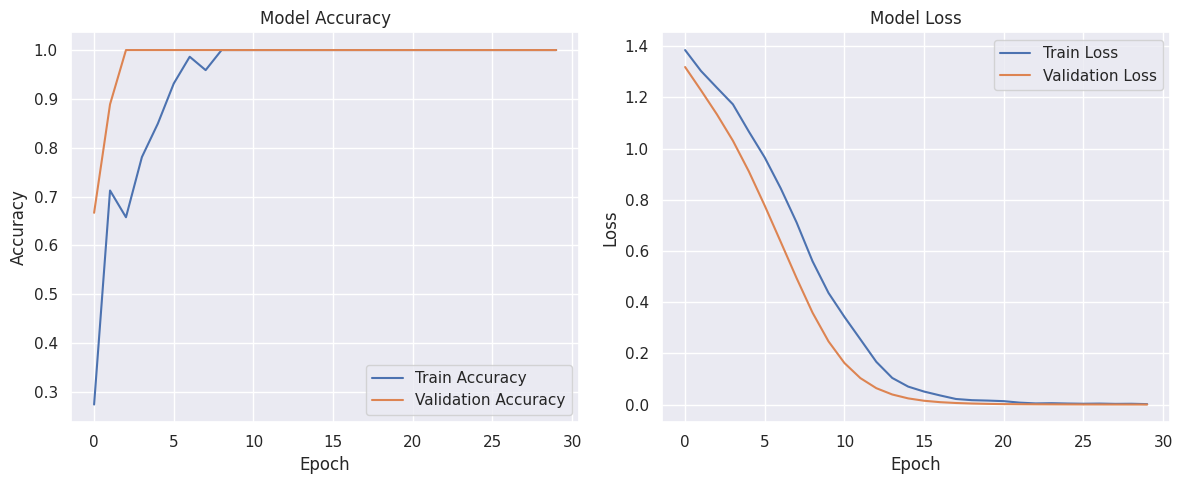

In [28]:
# Plot Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

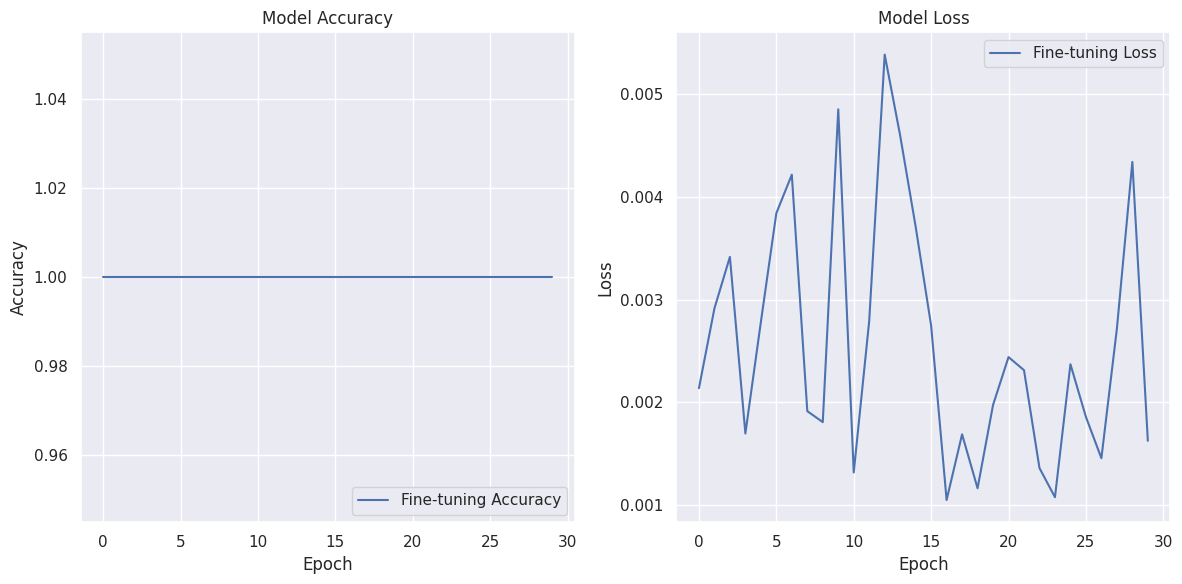

In [29]:
# Visualisasi Akurasi dan Loss setelah Fine-Tuning
plt.figure(figsize=(12, 6))

# Plot Akurasi Fine-tuning
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tuning Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss Fine-tuning
plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='Fine-tuning Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Menyusun layout dan menampilkan grafik
plt.tight_layout()
plt.show()


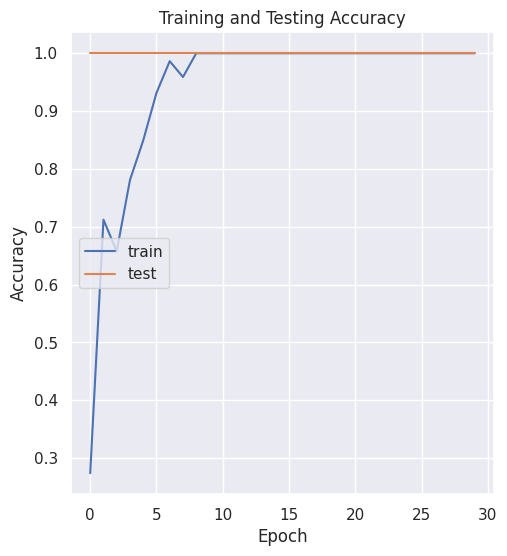

In [30]:
# Visualisasi Akurasi
plt.figure(figsize=(12, 6))

# Plot Akurasi pada data pelatihan dan validasi
plt.subplot(1, 2, 1)  # Sisi kiri
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tuning Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='center left')
plt.grid(True)
plt.show()


#Konversi Model ke Format .h5

In [31]:
# Menyimpan model dalam format .h5
model.save('model_city.h5')

#Inferensi (Prediksi)

In [32]:
# Memuat model yang telah diunggah dalam format .h5
model_inferensi = tf.keras.models.load_model('model_city.h5')  # Gantilah dengan nama file model Anda

In [33]:
# Misalkan input data yang akan diprediksi
city_input = "sumenep"
rating_input = 4
facilities_input = 3
visitor_input = 100
price_input = 3
# category_input = 10

# Preprocessing (seperti yang dilakukan sebelumnya)
city_vec = tfidf.transform([city_input]).toarray()  # Transformasi deskripsi ke vektor
rating_norm = scaler.transform([[rating_input]])  # Normalisasi rating
facilities_norm = scaler.transform([[facilities_input]])  # Normalisasi fasilitas
visitor_norm = scaler.transform([[visitor_input]])  # Normalisasi fasilitas
price_norm = scaler.transform([[price_input]])  # Normalisasi fasilitas
# kategori_norm = scaler.transform([[fasilitas_input]])  # Normalisasi fasilitas

# Menggabungkan fitur
input_data = np.hstack([city_vec, rating_norm, facilities_norm, visitor_norm, price_norm])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
# Melakukan prediksi dengan model
predictions = model_inferensi.predict(input_data)

# Menampilkan hasil prediksi
print("Prediksi:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediksi: [[7.9373451e-04 3.0351907e-04 5.2268832e-04 9.9838006e-01]]


In [35]:
# Jika menggunakan softmax, kita ambil kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions, axis=1)
print(f"Prediksi city: {predicted_class}")

Prediksi city: [3]


In [36]:
# Misalkan label_encoder digunakan untuk mengonversi indeks kelas ke nama kategori
predicted_category = label_encoder.inverse_transform(predicted_class)
print(f"Kategori yang diprediksi: {predicted_category[0]}")

Kategori yang diprediksi: Sumenep


In [37]:
# Fungsi prediksi kategori dari input teks
def predict_city(city, rating, facilities, visitor, price):
    # Transformasi kota (deskripsi teks) ke vektor menggunakan TF-IDF
    city_vec = tfidf.transform([city]).toarray()

    # Normalisasi fitur numerik lainnya (rating, fasilitas, jumlah pengunjung, harga)
    rating_norm = scaler.transform([[rating]])
    facilities_norm = scaler.transform([[facilities]])
    visitor_norm = scaler.transform([[visitor]])
    price_norm = scaler.transform([[price]])

    # Menggabungkan semua fitur menjadi satu input
    input_data = np.hstack([city_vec, rating_norm, facilities_norm, visitor_norm, price_norm])

    # Melakukan prediksi dengan model
    pred = model.predict(input_data)

    # Mengambil kelas dengan probabilitas tertinggi (untuk softmax output)
    pred_class = np.argmax(pred, axis=1)

    # Mengonversi indeks kelas ke nama kategori menggunakan label_encoder
    return label_encoder.inverse_transform(pred_class)[0]

# Contoh inferensi
contoh_city = "sampang"
city_pred = predict_city(contoh_city, rating=1, facilities=3, visitor=100, price=3)
print("Kategori wisata diprediksi:", city_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Kategori wisata diprediksi: Sampang


In [38]:
# Fungsi rekomendasi berbasis TensorFlow
def rekomendasi_tensorflow(city, rating, facilities, visitor, price, top_n=103):
    # Prediksi kategori wisata dari deskripsi + rating + fasilitas
    pred_city = predict_city(city, rating, facilities, visitor, price)

    # Preprocessing input query
    query_vec = tfidf.transform([city]).toarray()
    rating_scaled_q = scaler.transform([[rating]])
    facilities_scaled_q = scaler.transform([[facilities]])
    visitor_scaled_q = scaler.transform([[visitor]])
    price_scaled_q = scaler.transform([[price]])
    query_feature = np.hstack([query_vec, rating_scaled_q, facilities_scaled_q, visitor_scaled_q, price_scaled_q])

    # Hitung cosine similarity dengan data
    cosine_sim = cosine_similarity(query_feature, X)

    # Ambil top_n rekomendasi teratas berdasarkan kemiripan
    top_indices = np.argsort(cosine_sim[0])[::-1][:top_n]

    # Ambil data rekomendasi berdasarkan indeks
    rekom = df.iloc[top_indices].copy()

    # Tambahkan kolom prioritas kategori (kategori yang sama diberi prioritas lebih tinggi)
    rekom['prioritas'] = rekom['city'].apply(lambda x: 1 if x == pred_city else 0)

    # Urutkan: kategori cocok dulu, rating tinggi, fasilitas banyak
    rekom_sorted = rekom.sort_values(by=['prioritas', 'rating', 'facilities', 'visitor', 'price'], ascending=[False, False, False, False, False])

    return rekom_sorted[['name', 'city', 'rating', 'facilities', 'visitor', 'price', 'category', 'location', 'openingHours', 'closingHours', 'description', 'lat', 'lon', 'coordinat']]

hasil_rekom = rekomendasi_tensorflow(contoh_city, rating=1, facilities=3, visitor=100, price=3)
# print(hasil_rekom)
hasil_rekom.head(10)  # Menampilkan 10 rekomendasi teratas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

,name,city,rating,facilities,visitor,price,category,location,openingHours,closingHours,description,lat,lon,coordinat
38,Sumur Tujuh Panji Laras,Sampang,5.00,1,7065,0,6,"Jl. Mangkubumi, Rw. III, Polagan, Kec. Sampang...",-,-,Sumur Tujuh Panji Laras adalah kompleks sumur ...,-7.21,113.23,"lat: -7.20905, long: 113.23460"
45,Kampong Milon Napote,Sampang,4.90,2,11182,0,3,"Marenget Barat, Bira Timur, Kec. Sokobanah, Ka...",00:00:00,23:59:00,Kampung Milon Napote didirikan pada tahun 2016...,-6.91,113.40,"lat: -6.91209, long: 113.39582"
46,WMS Berung Ngambeng Spot Klobur,Sampang,4.80,2,3975,0,0,"Manduyan, Klobur, Kec. Sreseh, Kabupaten Sampa...",08:00:00,00:00:00,WMS Berung Ngambeng Spot Klobur adalah destina...,-7.19,113.09,"lat: -7.19168, long: 113.08836"
40,Situs Trunojoyo,Sampang,4.70,4,1103,0,6,"Jalan Pahlawan, Kelurahan Rongtengah, Kecamata...",-,-,Situs Pababaran Trunojoyo adalah petilasan ber...,-7.19,113.26,"lat: -7.19305, long: 113.25517"
37,Waduk Klampis,Sampang,4.70,1,1999,0,0,"Jl. Raya Kedundung, Dalbadung, Kramat, Kec. Ke...",09:00:00,17:00:00,Waduk Klampis adalah bendungan besar di Kabupa...,-7.11,113.23,"lat: -7.10692, long: 113.22603"
48,Perpustakaan Dan Arsip Kota Sampang,Sampang,4.60,3,38784,0,3,"Rw. III, Rong Tengah, Kec. Sampang, Kabupaten ...",08:00:00,16:00:00,Perpustakaan dan Arsip Kabupaten Sampang adala...,-7.20,113.25,"lat: -7.19609, long: 113.25231"
41,Desa Budaya Kerapan Sapi Ketapang Barat,Sampang,4.60,3,10297,0,1,"Barat, Bundan, Ketapang Barat, Kec. Ketapang, ...",-,-,Desa Budaya Kerapan Sapi Ketapang Barat adalah...,-6.89,113.32,"lat: -6.88595, long: 113.32147"
34,Karang Laut Mandangin,Sampang,4.60,2,1072,10000,0,"Pulau Mandangin, Kecamatan Sampang, Kabupaten ...",-,-,Karang Laut Mandangin adalah destinasi wisata ...,-7.31,113.21,"lat: -7.30760, long: 113.21134"
44,Edufarm Kampung Tani Panjalin,Sampang,4.60,1,877,0,3,"Lebak, Sokobanah Daya, Kec. Sokobanah, Kabupat...",08:00:00,16:00:00,Edufarm Kampung Tani Panjalin adalah desa wisa...,-6.90,113.44,"lat: -6.89667, long: 113.43771"
39,Situs Ratu Ibu,Sampang,4.40,3,5965,0,6,"Polagan, Sampang, Sampang Regency, East Java 6...",00:00:00,23:59:00,Kompleks Makam Ratu Ibu adalah situs sejarah d...,-7.21,113.23,"lat: -7.20827, long: 113.23284"
